# E-commerce site clients segmentation

# Content
- [Unpickling dataframes](#Unpickling-dataframes)
- [Use of RFM method as a segmentation reference](#Use-of-RFM-method-as-a-segmentation-reference)
- [Pickling dataframes](#Pickling-dataframes)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Use seaborn style defaults and set the default figure size
import seaborn as sns
sns.set(rc={'figure.figsize':(11, 6)})

## Unpickling dataframe

After we pickled the dataframe, we have to unpickle it.

In [2]:
# To unpickle the dataframe

new_df_for_segmentation_analysis = pd.read_pickle("./pickle_dataset_merged.pkl")

## Use of RFM method as a segmentation reference

So far we have created a dataframe that contains the main indicators that we will use for our analysis. 

For the clients segmentation we will start by using a method called RFM, which is widely used for customer analysis in market research.

**We will use the RFM method to compare the clients segmentation with other clustering methods, such as K-means.**

**RFM** stands for the three dimensions:

* **Recency** – How recently did the customer purchase?
* **Frequency** – How often do they purchase?
* **Monetary Value** – How much do they spend?

See reference: https://en.wikipedia.org/wiki/RFM_(market_research)

To compute the **Recency**, we will compute the number of days that has been since the a customer placed an order. The **frequency**  will be refered to the number of orders that a customer placed, and the **Monetary value** is the order payment value.

### Creation of RFM table

In [3]:
rfm_df =  new_df_for_segmentation_analysis.copy()

We already have the Frequence, which is the variable 'number_of_orders_for_a_customer'. Now we will compute the number of days that have past from a customer's last order placement. The monetary value is given by the variable 'payment_value_for_a_customer_order'.

In [4]:
columns_for_rfm = ['order_id', 
                    'customer_unique_id', 
                    'number_of_orders_for_a_customer', 
                    'order_purchase_timestamp', 
                    'payment_value_for_a_customer_order']

Now that we have selected the columns for the RFM segmentation, we will create a new dataframe that allows us to perform such analysis.

In [5]:
rfm_df = rfm_df[columns_for_rfm]

We will now calculate the Recency by calculating the number of days that have passed since the last order that a customer placed. We note that each customer and each order is unique.

In [6]:
recent_date = rfm_df['order_purchase_timestamp'].max()

rfm_df['Recency'] = rfm_df['order_purchase_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.head()

,order_id,customer_unique_id,number_of_orders_for_a_customer,order_purchase_timestamp,payment_value_for_a_customer_order,Recency
0,e22acc9c116caa3f2b7121bbb380d08e,0000366f3b9a7992bf8c76cfdf3221e2,1.0,2018-05-10,141.90,111
1,3594e05a005ac4d06a72673270ef9ec9,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,2018-05-07,27.19,114
2,b33ec3b699337181488304f362a6b734,0000f46a3911fa3c0805444483337064,1.0,2017-03-10,86.22,537
3,41272756ecddd9a9ed0180413cc22fb6,0000f6ccb0745a6a4b88665a16c9f078,1.0,2017-10-12,43.62,321
4,d957021f1127559cd947b62533f484f7,0004aac84e0df4da2b147fca70cf8255,1.0,2017-11-14,196.89,288


In [7]:
rfm_df.rename(columns={'number_of_orders_for_a_customer': 'Frequency',
                        'payment_value_for_a_customer_order': 'Monetary_value'}, inplace=True)

We create the dataframe with Frequency, Monetary_value and Recency variables.

In [8]:
rfm_df = rfm_df.drop(columns=['order_id', 'order_purchase_timestamp'])

rfm_df.head()

,customer_unique_id,Frequency,Monetary_value,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,141.90,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,27.19,114
2,0000f46a3911fa3c0805444483337064,1.0,86.22,537
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,43.62,321
4,0004aac84e0df4da2b147fca70cf8255,1.0,196.89,288


We now visualize the variables distributions.

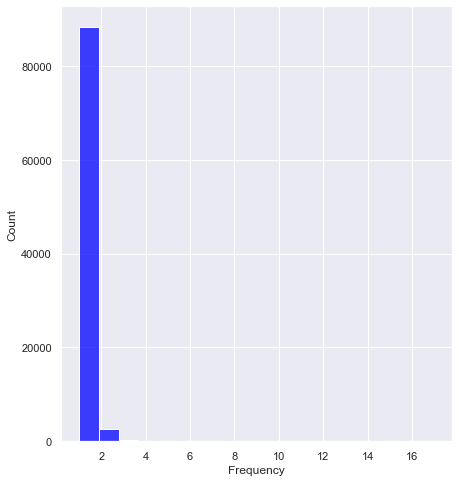

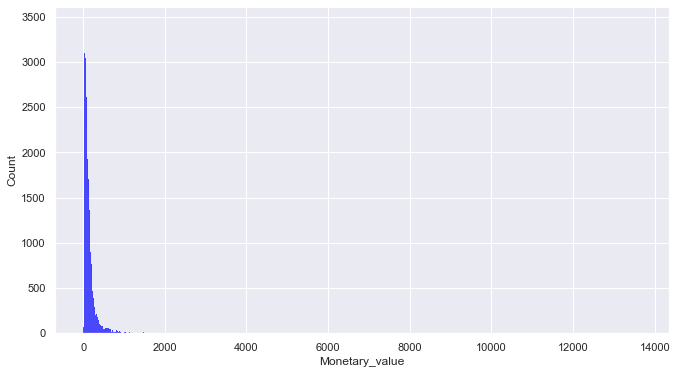

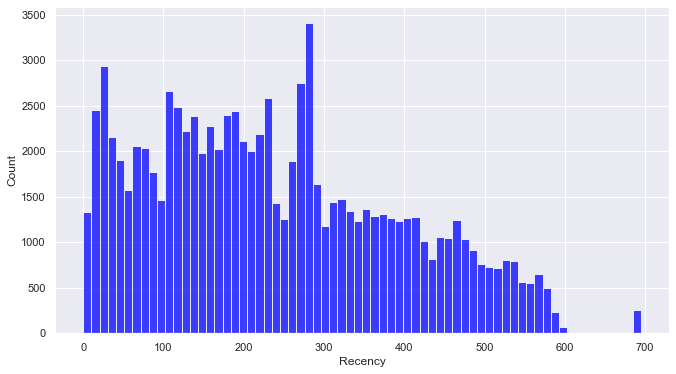

In [9]:
plt.subplots(figsize=(7, 8))

columns_histogram=['Frequency', 'Monetary_value', 'Recency']

for i in rfm_df.columns:
    if i in columns_histogram:
        sns.histplot(data=rfm_df, x=i, color="blue")
        plt.show()

### Heuristic RFM

In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.

See reference: https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/

In the RFM method, we need to create a score with is based in heuristic rules where **R + F + M = RFM Score**. This is, it depends on the company's rules. For example, a company can give more priority to the Monetary Value. This is used as a rule to compute the RFM Score. So in general, we multiply the terms R, F and M by constant a,b and c, to determine depending on the priorities of the company.

For example:

**a(Recency) + b(Frequency) + c(Monetary Value) = RFM Score**

Rating Customer based upon the RFM Score:

* RFM Score = 5: Top customer
* RMF Score = 4: High value customer
* RMF Score = 3: Medium value customer
* RMF Score = 2: Low-value customer
* RMF Score = 1: Lost customer

#### Ranking customers based on their Recency, Frequency, and Monetary value

We will normalize the rank of the customers to analyze the ranking.

In [10]:
rfm_df_heuristic_method = rfm_df.copy()

In [11]:
# max: highest rank in the group
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rank.html

rfm_df_heuristic_method['R_rank'] = rfm_df_heuristic_method['Recency'].rank(ascending=True)
rfm_df_heuristic_method['F_rank'] = rfm_df_heuristic_method['Frequency'].rank(ascending=True)
rfm_df_heuristic_method['M_rank'] = rfm_df_heuristic_method['Monetary_value'].rank(ascending=True)

In [12]:
# normalizing the rank of the customers 

rfm_df_heuristic_method['R_rank_norm'] = (rfm_df_heuristic_method['R_rank']/rfm_df_heuristic_method['R_rank'].max())
rfm_df_heuristic_method['F_rank_norm'] = (rfm_df_heuristic_method['F_rank']/rfm_df_heuristic_method['F_rank'].max())
rfm_df_heuristic_method['M_rank_norm'] = (rfm_df_heuristic_method['F_rank']/rfm_df_heuristic_method['M_rank'].max())

rfm_df_heuristic_method.head()

,customer_unique_id,Frequency,Monetary_value,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,141.90,111,21888.0,44139.0,59621.0,0.239926,0.483816,0.483816
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,27.19,114,22821.0,44139.0,2737.5,0.250153,0.483816,0.483816
2,0000f46a3911fa3c0805444483337064,1.0,86.22,537,88049.5,44139.0,37773.5,0.965159,0.483816,0.483816
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,43.62,321,65013.0,44139.0,12387.5,0.712643,0.483816,0.483816
4,0004aac84e0df4da2b147fca70cf8255,1.0,196.89,288,60408.0,44139.0,72533.5,0.662165,0.483816,0.483816


In [13]:
rfm_df_heuristic_method.describe()

,Frequency,Monetary_value,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm
count,91231.000000,91231.000000,91231.000000,91231.000000,91231.000000,91231.000000,91231.000000,91231.000000,91231.000000
mean,1.036161,157.819703,237.971709,45616.000000,45616.000000,45616.000000,0.500022,0.500005,0.500005
std,0.218655,216.074965,152.879158,26336.178855,8074.573559,26336.264505,0.288685,0.088507,0.088507
min,1.000000,0.250000,0.000000,6.000000,44139.000000,1.000000,0.000066,0.483816,0.483816
25%,1.000000,60.650000,114.000000,22821.000000,44139.000000,22809.500000,0.250153,0.483816,0.483816
50%,1.000000,103.460000,219.000000,45683.500000,44139.000000,45614.500000,0.500762,0.483816,0.483816
75%,1.000000,174.970000,347.000000,68399.000000,44139.000000,68422.500000,0.749759,0.483816,0.483816
max,17.000000,13664.080000,695.000000,91228.000000,91231.000000,91231.000000,1.000000,1.000000,1.000000


#### Calculating RFM score

As we previously mentioned, we need to create a score with is based in heuristic rules where **R + F + M = RFM Score**. Based on this score, we will segment the customers.

We will use the rule:

**40(Recency) + 40(Frequency) + 20(Monetary Value) = RFM Score**

Here we give equally importance to the Recency and the Frequency, this is, to those customers who recently placed orders and bought more than one product in an order. Then, we gave less importance to the Monetary value. 

In [14]:
rfm_df_heuristic_method['RFM_Score'] = 40*rfm_df_heuristic_method['R_rank_norm'] \
                                        + 40*rfm_df_heuristic_method['F_rank_norm'] \
                                        + 20*rfm_df_heuristic_method['M_rank_norm']

rfm_df_heuristic_method['RFM_Score'] *= 0.05

rfm_df_heuristic_method = rfm_df_heuristic_method.round(0)

rfm_df_heuristic_method.head()

,customer_unique_id,Frequency,Monetary_value,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,142.0,111,21888.0,44139.0,59621.0,0.0,0.0,0.0,2.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,27.0,114,22821.0,44139.0,2738.0,0.0,0.0,0.0,2.0
2,0000f46a3911fa3c0805444483337064,1.0,86.0,537,88050.0,44139.0,37774.0,1.0,0.0,0.0,3.0
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,44.0,321,65013.0,44139.0,12388.0,1.0,0.0,0.0,3.0
4,0004aac84e0df4da2b147fca70cf8255,1.0,197.0,288,60408.0,44139.0,72534.0,1.0,0.0,0.0,3.0


In [15]:
rfm_df_heuristic_method.describe()

,Frequency,Monetary_value,Recency,R_rank,F_rank,M_rank,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
count,91231.000000,91231.000000,91231.000000,91231.000000,91231.000000,91231.000000,91231.000000,91231.000000,91231.000000,91231.000000
mean,1.036161,157.823865,237.971709,45616.029080,45615.999057,45615.998586,0.500795,0.032379,0.032379,2.500170
std,0.218655,216.076111,152.879158,26336.162035,8074.568253,26336.261334,0.500002,0.177006,0.177006,0.621298
min,1.000000,0.000000,0.000000,6.000000,44139.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,61.000000,114.000000,22821.000000,44139.000000,22810.000000,0.000000,0.000000,0.000000,2.000000
50%,1.000000,103.000000,219.000000,45684.000000,44139.000000,45614.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,175.000000,347.000000,68399.000000,44139.000000,68422.000000,1.000000,0.000000,0.000000,3.000000
max,17.000000,13664.000000,695.000000,91228.000000,91231.000000,91231.000000,1.000000,1.000000,1.000000,5.000000


Now that we have created a variable for the RFM_Score, we will drop some columns in order to keep only those that are more useful for a table visualization. The idea is create after a variable that contains a name for the customers segments. 

In [16]:
rfm_df_heuristic_method = rfm_df_heuristic_method.drop(columns=['R_rank', 
                                                                'F_rank', 
                                                                'M_rank', 
                                                                'R_rank_norm', 
                                                                'F_rank_norm', 
                                                                'M_rank_norm'])
# rfm_df.describe()

We now asign names to each customer segment according to their RFM_Score, based on:

* RFM Score = 5: Top customer
* RMF Score = 4: High value customer
* RMF Score = 3: Medium value customer
* RMF Score = 2: Low-value customer
* RMF Score = 1: Lost customer

In [17]:
rfm_df_heuristic_method["Customer_segment"] = np.where(rfm_df_heuristic_method['RFM_Score'] == 5, "Top customer",
                                                (np.where(rfm_df_heuristic_method['RFM_Score'] == 4, "High value customer",
                                                (np.where(rfm_df_heuristic_method['RFM_Score'] == 3, "Medium value customer",
                                                np.where(rfm_df_heuristic_method['RFM_Score'] > 1.5, 'Low value customer', 'Lost customer'))))))

rfm_df_heuristic_method.head()

,customer_unique_id,Frequency,Monetary_value,Recency,RFM_Score,Customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,142.0,111,2.0,Low value customer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,27.0,114,2.0,Low value customer
2,0000f46a3911fa3c0805444483337064,1.0,86.0,537,3.0,Medium value customer
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,44.0,321,3.0,Medium value customer
4,0004aac84e0df4da2b147fca70cf8255,1.0,197.0,288,3.0,Medium value customer


#### Visualizing the customer segments

We will use a pie plot to display all segments of customers.

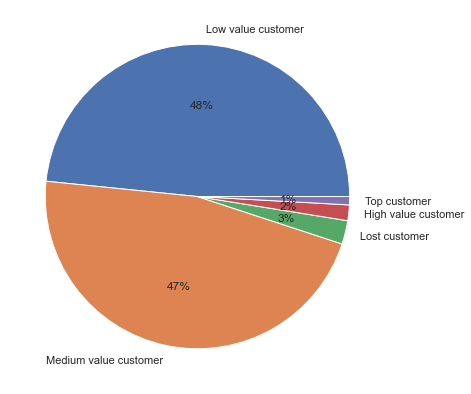

In [18]:
plt.subplots(figsize=(7,7))
plt.pie(rfm_df_heuristic_method.Customer_segment.value_counts(), labels=rfm_df_heuristic_method.Customer_segment.value_counts().index, autopct='%.0f%%')
plt.show()

### RFM quintiles method

We will perform a second method for the customers segmentation based on a quintiles method. As we will further see, this method in principle will allow us to obtain a more detailed segmentation.

In [19]:
rfm_df_quintiles_method =  rfm_df.copy()

In [20]:
rfm_df_quintiles_method.head()

,customer_unique_id,Frequency,Monetary_value,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1.0,141.90,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1.0,27.19,114
2,0000f46a3911fa3c0805444483337064,1.0,86.22,537
3,0000f6ccb0745a6a4b88665a16c9f078,1.0,43.62,321
4,0004aac84e0df4da2b147fca70cf8255,1.0,196.89,288


#### Log-transform of the data to treat skewness

We perform a Log-transformation to restore as much as possible the symmetry of the distributions for the Frequency, Monetary value and Recency.

In [21]:
rfm_columns_for_log_transformation = ['Frequency',
                                        'Monetary_value',
                                        'Recency']

In [22]:
for col in rfm_df_quintiles_method.columns:
    if col in rfm_columns_for_log_transformation:
        rfm_df_quintiles_method[col] = np.log10(rfm_df_quintiles_method[col] + 0.1) 

In [23]:
rfm_df_quintiles_method.describe()

,Frequency,Monetary_value,Recency
count,91231.000000,91231.000000,91231.000000
mean,0.051051,2.028743,2.237942
std,0.054018,0.357409,0.416413
min,0.041393,-0.455932,-1.000000
25%,0.041393,1.783546,2.057286
50%,0.041393,2.015192,2.340642
75%,0.041393,2.243212,2.540455
max,1.232996,4.135584,2.842047


<AxesSubplot:xlabel='Frequency', ylabel='Count'>

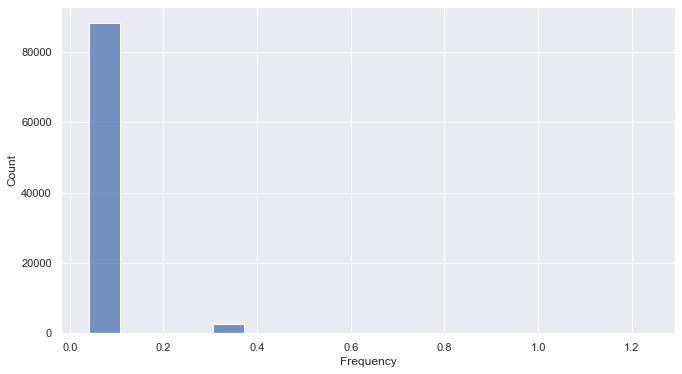

In [24]:
sns.histplot(data=rfm_df_quintiles_method, x='Frequency')

<AxesSubplot:xlabel='Monetary_value', ylabel='Count'>

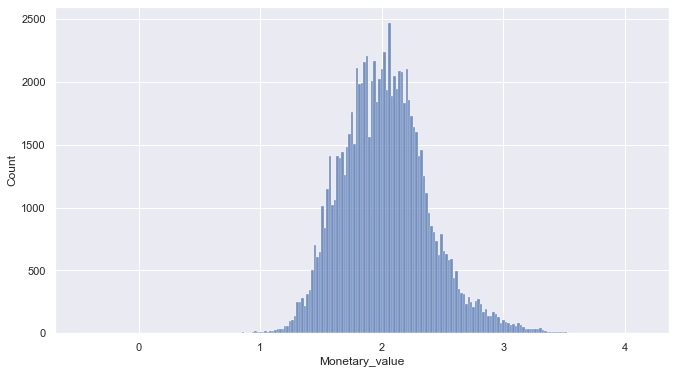

In [25]:
sns.histplot(data=rfm_df_quintiles_method, x='Monetary_value')

<AxesSubplot:xlabel='Recency', ylabel='Count'>

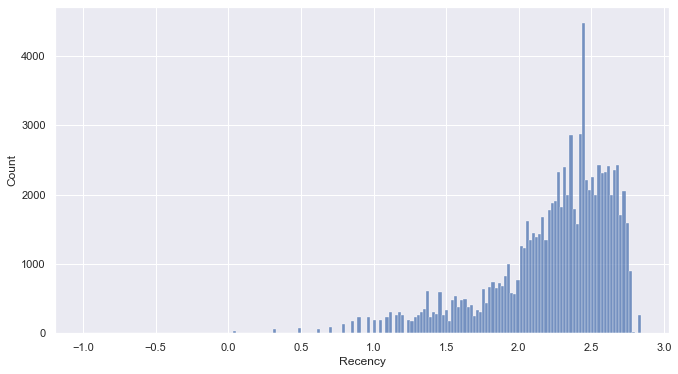

In [26]:
sns.histplot(data=rfm_df_quintiles_method, x='Recency')

#### Quintile calculation 

We will calculate the quintile values for the dataframe variables.

In [27]:
quintiles = rfm_df_quintiles_method.quantile(q=[0.20, 0.40, 0.60, 0.80])

print(quintiles)

     Frequency  Monetary_value   Recency
0.2   0.041393        1.725748  1.964260
0.4   0.041393        1.923503  2.248219
0.6   0.041393        2.102571  2.428297
0.8   0.041393        2.300030  2.583312


In [28]:
quintiles = quintiles.to_dict()

quintiles

{'Frequency': {0.2: 0.04139268515822508,
  0.4: 0.04139268515822508,
  0.6: 0.04139268515822508,
  0.8: 0.04139268515822508},
 'Monetary_value': {0.2: 1.7257483329955483,
  0.4: 1.9235030669421045,
  0.6: 2.1025709018542993,
  0.8: 2.3000299678823013},
 'Recency': {0.2: 1.964259630196849,
  0.4: 2.248218561190075,
  0.6: 2.4282968139828798,
  0.8: 2.583312151983078}}

Now we will asign scores for the Recency, Monetary value and Frecuency, asociated to their quintiles. 

In [29]:
def RScore(x,p,d):
    """Returns the Recency score for a value relative to quintile value"""
    if x <= d[p][0.20]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]: 
        return 3
    elif x <= d[p][0.80]: 
        return 4
    else:
        return 5
    
def FMScore(x,p,d):
    """Returns the Frequency and Monetary value score for a value relative to quintile value"""
    if x <= d[p][0.20]:
        return 1
    elif x <= d[p][0.40]:
        return 2
    elif x <= d[p][0.60]: 
        return 3
    elif x <= d[p][0.80]: 
        return 4
    else:
        return 5

We will create a dataframe with the RFM score.

In [30]:
rfm_df_quintiles_method['R_score'] = rfm_df_quintiles_method['Recency'].apply(RScore, args=('Recency',quintiles))

rfm_df_quintiles_method['F_score'] = rfm_df_quintiles_method['Frequency'].apply(FMScore, args=('Frequency',quintiles))

rfm_df_quintiles_method['M_score'] = rfm_df_quintiles_method['Monetary_value'].apply(FMScore, args=('Monetary_value',quintiles))

rfm_df_quintiles_method['RFM_Score'] = (rfm_df_quintiles_method["R_score"].astype(str)) \
                                        .str.cat(rfm_df_quintiles_method["F_score"].astype(str)) \
                                        .str.cat(rfm_df_quintiles_method["M_score"].astype(str))

rfm_df_quintiles_method.head()

,customer_unique_id,Frequency,Monetary_value,Recency,R_score,F_score,M_score,RFM_Score
0,0000366f3b9a7992bf8c76cfdf3221e2,0.041393,2.152288,2.045714,2,1,4,214
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.041393,1.436004,2.057286,2,1,1,211
2,0000f46a3911fa3c0805444483337064,0.041393,1.936111,2.730055,5,1,3,513
3,0000f6ccb0745a6a4b88665a16c9f078,0.041393,1.640680,2.506640,4,1,1,411
4,0004aac84e0df4da2b147fca70cf8255,0.041393,2.294444,2.459543,4,1,4,414


In [31]:
rfm_df_quintiles_method['RFM_Score'].unique()

array(['214', '211', '513', '411', '414', '315', '514', '511', '413',
       '212', '311', '415', '111', '115', '515', '512', '313', '112',
       '153', '114', '314', '113', '213', '412', '215', '354', '252',
       '312', '552', '353', '554', '151', '454', '451', '452', '352',
       '355', '555', '154', '253', '551', '351', '155', '255', '453',
       '251', '254', '553', '455', '152'], dtype=object)

#### Customers segmentation

The RFM scores give us 5^(3) = 125 segments. Which is not easy to work with. 

See reference: https://practicaldatascience.co.uk/data-science/how-to-visualise-rfm-data-using-treemaps

We can also work on a more detailed segmentation in which we choose to create a new feature 'FM score' that is the rounded down mean of Frequency and Monetary value scores.

See reference: https://medium.com/analytics-vidhya/customer-segmentation-analysis-with-rfm-using-python-and-power-bi-1a93e7938053

We are going to keep 10 segments based on the Recency and Frequency scores. Here is the description of the segments:

* Champions: Bought recently, buy often and spend the most.
* Loyal Customers: Buy on a regular basis. Responsive to promotions.
* Potential Loyalists: Recent customers with average frequency.
* Recent Customers: Bought most recently, but not often.
* Customers Needing Attention: Above average recency, frequency and monetary values. May not have bought very recently though.
* At Risk: Purchased often but a long time ago. Need to bring them back.
* Can't Lose Them: Used to purchase frequently but haven't returned for a long time.
* About To Sleep: Below average recency and frequency. Will lose them if not reactivated.
* Hibernating: Last purchase was long back and low number of orders.
* Lost Customers: Purchased long time ago and never came back.

See reference: https://guillaume-martin.github.io/rfm-segmentation-with-python.html

In [32]:
rfm_new_df_quintiles_method = rfm_df_quintiles_method.copy()

In [33]:
import math

def truncate(x): return math.trunc(x)

rfm_new_df_quintiles_method['FM_score'] = ((rfm_new_df_quintiles_method['F_score'] + rfm_new_df_quintiles_method['M_score'])/2).apply(lambda x: truncate(x))

In [34]:
rfm_new_df_quintiles_method.head()

,customer_unique_id,Frequency,Monetary_value,Recency,R_score,F_score,M_score,RFM_Score,FM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,0.041393,2.152288,2.045714,2,1,4,214,2
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.041393,1.436004,2.057286,2,1,1,211,1
2,0000f46a3911fa3c0805444483337064,0.041393,1.936111,2.730055,5,1,3,513,2
3,0000f6ccb0745a6a4b88665a16c9f078,0.041393,1.640680,2.506640,4,1,1,411,1
4,0004aac84e0df4da2b147fca70cf8255,0.041393,2.294444,2.459543,4,1,4,414,2


In [35]:
rfm_new_df_quintiles_method.describe()

,Frequency,Monetary_value,Recency,R_score,F_score,M_score,FM_score
count,91231.000000,91231.000000,91231.000000,91231.000000,91231.000000,91231.000000,91231.000000
mean,0.051051,2.028743,2.237942,2.996032,1.129517,2.999847,1.864673
std,0.054018,0.357409,0.416413,1.415231,0.708026,1.414221,0.831128
min,0.041393,-0.455932,-1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.041393,1.783546,2.057286,2.000000,1.000000,2.000000,1.000000
50%,0.041393,2.015192,2.340642,3.000000,1.000000,3.000000,2.000000
75%,0.041393,2.243212,2.540455,4.000000,1.000000,4.000000,2.000000
max,1.232996,4.135584,2.842047,5.000000,5.000000,5.000000,5.000000


In [36]:
segt_map = {
            # 'R, FM':
            r'11': 'Lost Customers', # Purchased long time ago and never came back.
            r'12': 'Hibernating', # Last purchase was long back and low number of orders.
            r'2[1-2]': 'About To Sleep', # Below average recency and frequency. Will lose them if not reactivated.
            r'[1-2][1-4]': 'Can\'t Loose Them', # Used to purchase frequently but haven't returned for a long time.
            r'[1-2]5': 'At Risk', # Purchased often but a long time ago. Need to bring them back.
            r'[1-3][3-5]': 'Customers Needing Attention', # Above average recency, frequency and monetary values. May not have bought very recently though.
            r'[3-5][1-2]': 'Recent customers', # Bought most recently, but not often.
            r'[4-5][2-3]': 'Potential Loyalists', # Recent customers with average frequency.
            r'[4-5][4-5]': 'Loyal Customers', # Buy on a regular basis. Responsive to promotions.
            r'55': 'Champions' # Bought recently, buy often and spend the most.
            }

rfm_new_df_quintiles_method['Segment_name'] = rfm_new_df_quintiles_method['R_score'].map(str) + rfm_new_df_quintiles_method['FM_score'].map(str)

rfm_new_df_quintiles_method['Segment_name'] = rfm_new_df_quintiles_method['Segment_name'].replace(segt_map, regex=True)

rfm_new_df_quintiles_method.head()

,customer_unique_id,Frequency,Monetary_value,Recency,R_score,F_score,M_score,RFM_Score,FM_score,Segment_name
0,0000366f3b9a7992bf8c76cfdf3221e2,0.041393,2.152288,2.045714,2,1,4,214,2,About To Sleep
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.041393,1.436004,2.057286,2,1,1,211,1,About To Sleep
2,0000f46a3911fa3c0805444483337064,0.041393,1.936111,2.730055,5,1,3,513,2,Recent customers
3,0000f6ccb0745a6a4b88665a16c9f078,0.041393,1.640680,2.506640,4,1,1,411,1,Recent customers
4,0004aac84e0df4da2b147fca70cf8255,0.041393,2.294444,2.459543,4,1,4,414,2,Recent customers


<AxesSubplot:xlabel='count', ylabel='Segment_name'>

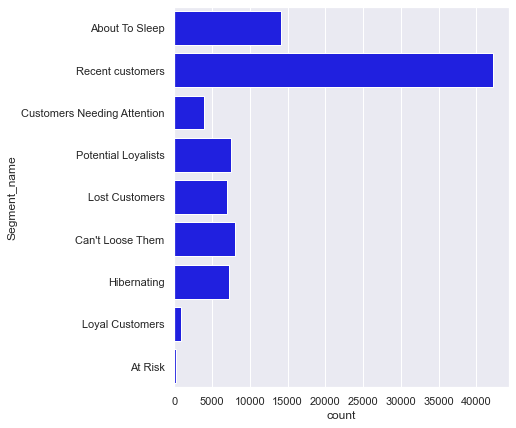

In [37]:
plt.subplots(figsize=(6, 7))

sns.countplot(y="Segment_name", data=rfm_new_df_quintiles_method, color="blue")

In [38]:
df_treemap_new = rfm_new_df_quintiles_method.groupby('Segment_name').agg(customers=('customer_unique_id', 'count')).reset_index()

In [39]:
df_treemap_new.head(10)

,Segment_name,customers
0,About To Sleep,14144
1,At Risk,202
2,Can't Loose Them,8039
3,Customers Needing Attention,3973
4,Hibernating,7314
5,Lost Customers,6943
6,Loyal Customers,838
7,Potential Loyalists,7553
8,Recent customers,42225


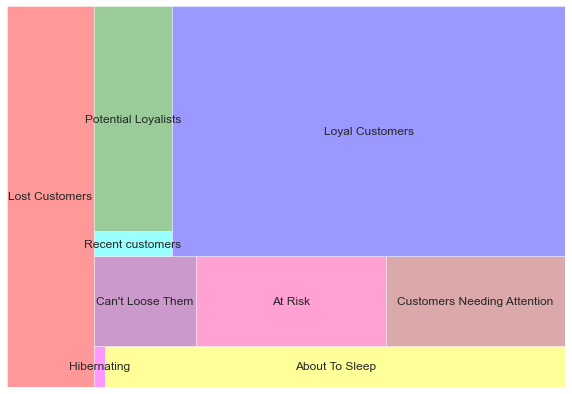

In [40]:
import squarify
fig, ax = plt.subplots(1, figsize = (10,7))

squarify.plot(sizes=df_treemap_new['customers'], 
                label=["Lost Customers", "Hibernating", "About To Sleep", "Can\'t Loose Them", "At Risk",
                        "Customers Needing Attention", "Recent customers", "Potential Loyalists", "Loyal Customers", "Champions"], alpha=.4,
                color=["red","magenta","yellow","purple","deeppink","brown","cyan","green","blue","mediumblue"])

plt.axis('off')

plt.show()

In [41]:
rfm_new_df_for_new_merge = rfm_new_df_quintiles_method.copy()

In [42]:
rfm_new_df_for_new_merge = rfm_new_df_for_new_merge.drop(columns=['Frequency', 
                                                                    'Monetary_value', 
                                                                    'Recency', 
                                                                    'R_score', 
                                                                    'F_score', 
                                                                    'M_score', 
                                                                    'RFM_Score', 
                                                                    'FM_score'])

In [43]:
rfm_new_df_for_automatic_segmentation = pd.merge(rfm_new_df_for_new_merge, rfm_df_heuristic_method, on='customer_unique_id')

In [44]:
rfm_new_df_for_automatic_segmentation.head(20)

,customer_unique_id,Segment_name,Frequency,Monetary_value,Recency,RFM_Score,Customer_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,About To Sleep,1.0,142.0,111,2.0,Low value customer
1,0000b849f77a49e4a4ce2b2a4ca5be3f,About To Sleep,1.0,27.0,114,2.0,Low value customer
2,0000f46a3911fa3c0805444483337064,Recent customers,1.0,86.0,537,3.0,Medium value customer
3,0000f6ccb0745a6a4b88665a16c9f078,Recent customers,1.0,44.0,321,3.0,Medium value customer
4,0004aac84e0df4da2b147fca70cf8255,Recent customers,1.0,197.0,288,3.0,Medium value customer
5,0004bd2a26a76fe21f786e4fbd80607f,About To Sleep,1.0,167.0,146,2.0,Low value customer
6,00050ab1314c0e55a6ca13cf7181fecf,About To Sleep,1.0,35.0,131,2.0,Low value customer
7,00053a61a98854899e70ed204dd4bafe,Customers Needing Attention,1.0,419.0,182,2.0,Low value customer
8,0005e1862207bf6ccc02e4228effd9a0,Recent customers,1.0,150.0,543,3.0,Medium value customer
9,0005ef4cd20d2893f0d9fbd94d3c0d97,About To Sleep,1.0,130.0,170,2.0,Low value customer


In [45]:
rfm_new_df_for_automatic_segmentation.describe()

,Frequency,Monetary_value,Recency,RFM_Score
count,91231.000000,91231.000000,91231.000000,91231.000000
mean,1.036161,157.823865,237.971709,2.500170
std,0.218655,216.076111,152.879158,0.621298
min,1.000000,0.000000,0.000000,1.000000
25%,1.000000,61.000000,114.000000,2.000000
50%,1.000000,103.000000,219.000000,2.000000
75%,1.000000,175.000000,347.000000,3.000000
max,17.000000,13664.000000,695.000000,5.000000


In [46]:
rfm_new_df_for_automatic_segmentation = rfm_new_df_for_automatic_segmentation.drop(columns=['Customer_segment'])

## Pickling dataframes

In [47]:
# To pickle the data frame

new_df_for_segmentation_analysis.to_pickle("./pickle_data_automatic_segmentation.pkl")
rfm_new_df_for_automatic_segmentation.to_pickle("./pickle_data_RFM_segmentation.pkl")